### 1. Підготовка середовища

In [1]:
!pip install nltk
!pip install spacy
!pip install gensim --upgrade


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import pandas as pd
import re
import nltk
import spacy
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.svm import LinearSVC


In [3]:
# Завантажуємо ресурси NLTK
nltk.download('stopwords')


nlp = spacy.load("en_core_web_sm")
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\иван\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import sys
print(sys.executable)

c:\polina\yniver\Kubiedinova_Data_Analysis\myenv\Scripts\python.exe


### Завантаження даних

In [ ]:
data = pd.read_csv("IMDB Dataset.csv") 
print("Перші 5 рядків датасету:")
print(data.head())

Перші 5 рядків датасету:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


### Передобробка тексту

In [9]:
data['cleaned_text'] = data['review'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x).lower()))

# 3.2 Видалення стоп-слів
data['cleaned_text'] = data['cleaned_text'].apply(
   lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)

# 3.3 Лемматизація
data['lemmatized_text'] = data['cleaned_text'].apply(
   lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)

print("Приклад після передобробки:")
print(data[['review', 'lemmatized_text']].head())

Приклад після передобробки:
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                     lemmatized_text  
0  one reviewer mention watch 1 oz episode you ll...  
1  wonderful little production br br filming tech...  
2  think wonderful way spend time hot summer week...  
3  basically there s family little boy jake think...  
4  petter matteis love time money visually stunni...  


### Векторизація тексту

In [23]:
vectorizer = TfidfVectorizer(max_features=500)
count_vect = CountVectorizer(max_features=5000)
X_text = data['lemmatized_text']
X = vectorizer.fit_transform(data['lemmatized_text'])

### Розбиття даних

In [24]:
y = data['sentiment'] # замініть на назву колонки з мітками у вашому датасеті
X_bow = count_vect.fit_transform(X_text)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)


### Навчання моделі

Naive Bayes (BoW) Accuracy: 0.8469
Naive Bayes (TF-IDF) Accuracy: 0.8157
Logistic Regression (TF-IDF) Accuracy: 0.8430
Linear SVM (TF-IDF) Accuracy: 0.8422

Порівняння точності моделей:
Naive Bayes (BoW): 0.8469
Naive Bayes (TF-IDF): 0.8157
Logistic Regression (TF-IDF): 0.8430
Linear SVM (TF-IDF): 0.8422


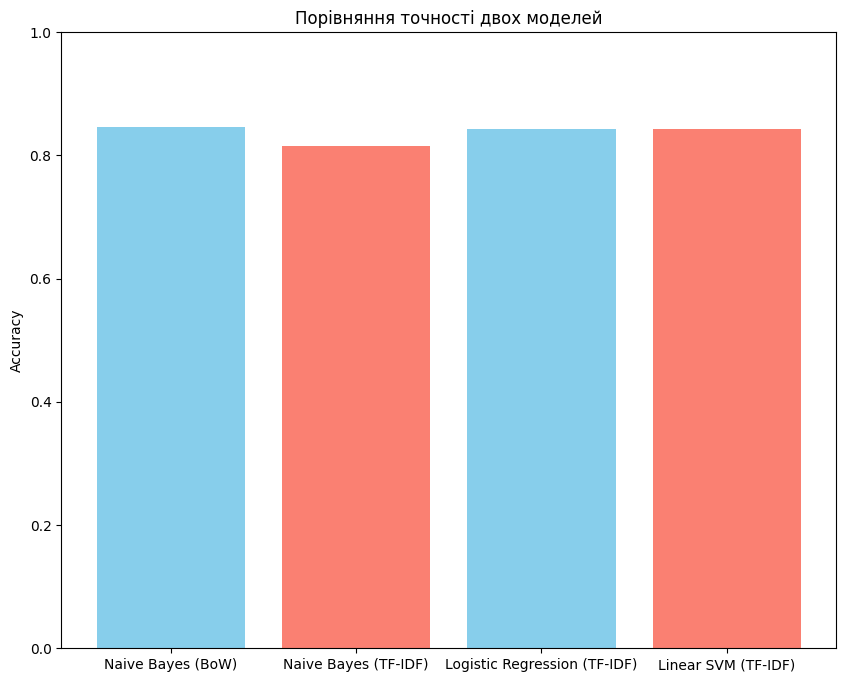

In [27]:
models = {
   'Naive Bayes (BoW)': (MultinomialNB(), X_train_bow, X_test_bow),
   'Naive Bayes (TF-IDF)': (MultinomialNB(), X_train, X_test),
   'Logistic Regression (TF-IDF)': (LogisticRegression(max_iter=1000), X_train, X_test),
   'Linear SVM (TF-IDF)': (LinearSVC(max_iter=1000), X_train, X_test)
}

results = {}

for name, (model, X_train_model, X_test_model) in models.items():
   model.fit(X_train_model, y_train)
   y_pred = model.predict(X_test_model)
   acc = accuracy_score(y_test, y_pred)
   results[name] = acc
   print(f"{name} Accuracy: {acc:.4f}")
#model = MultinomialNB()
#model.fit(X_train, y_train)
   
print("\nПорівняння точності моделей:")
for model, acc in results.items():
   print(f"{model}: {acc:.4f}")
   
plt.figure(figsize=(10,8))
plt.bar(results.keys(), results.values(), color=['skyblue','salmon'])
plt.ylim(0,1)
plt.ylabel('Accuracy')
plt.title('Порівняння точності двох моделей')
plt.show()

### Оцінка моделі

Точність моделі: 0.8157


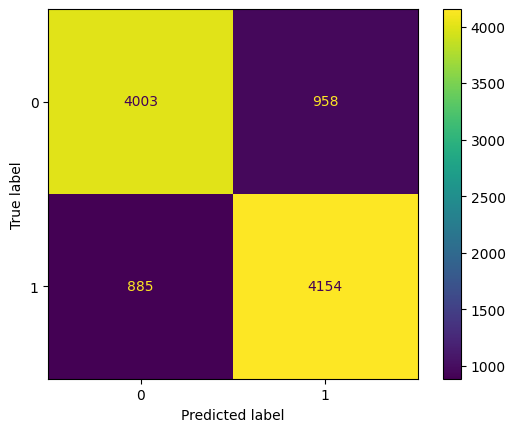

Text: One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to t

In [32]:

model_name = "Naive Bayes (TF-IDF)"
model, X_train_model, X_test_model = models[model_name]
y_pred = model.predict(X_test_model)
print("Точність моделі:", accuracy_score(y_test, y_pred))

# Матриця похибок
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

# Показуємо приклади передбачень
for i in range(5):
   print(f"Text: {data['review'].iloc[i]}")
   print(f"Predicted label: {y_pred[i]}")